<a href="https://colab.research.google.com/github/ktgokr/machineLearning/blob/main/Boston_housing_remodeling_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.datasets import load_boston
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

In [ ]:
boston = load_boston()

In [ ]:
boston

In [ ]:
boston.data.shape

(506, 13)

In [21]:
#make extend boston dataset
#referencce :  http://github.com/amueller/mglearn/blob/master/mglearn/datasets.py#L30

def load_boston_dataset(is_extended = False):
    boston_house_data = load_boston()
   
    if is_extended:
     X = boston_house_data.data

     X = MinMaxScaler().fit_transform(boston_house_data.data)
     X = PolynomialFeatures(degress =2, include_bias = False).fit_transform(X)

     return X, boston_house_data.target
  
    else:
     boston_house_df = pd.DataFrame(boston_house_data.data, columns=boston_house_data.feature_names)
     boston_house_df['PRICE'] = boston_house_data.target
     X= boston_house_df.iloc[:,:-1]
     Y = boston_house_data.target

     return X, Y



In [23]:
X, y = load_boston_dataset(is_extended = False)
print(X.shape)
print(X)
print(y)

(506, 13)
        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 rows x 13 columns]
[24. 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

Text(0.5, 1.0, 'Correlation Matrix')

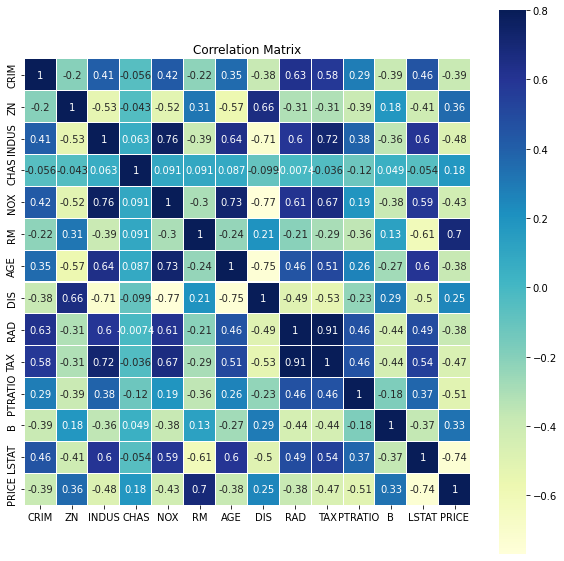

In [33]:
boston_house_df = pd.DataFrame(X)
boston_house_df['PRICE'] = y

corr = boston_house_df.corr()
plt.figure(figsize=(10,10));
sns.heatmap(corr,
            vmax = 0.8,
            linewidths=0.01,
            square = True,
            annot= True,
            cmap= 'YlGnBu');
plt.title('Correlation Matrix')

In [38]:
#80%트레이닝 데이터, 20% 테스트 데이터
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)


In [39]:
#선형회구 모델 선언
lr = LinearRegression()

#선형회귀 모델 학습
lr.fit(X_train, Y_train)

#데이터 테스트에 대한 예측
y_pred = lr.predict(X_test)



In [40]:
 #MSE(Mean Squared Error)를 측정합니다.
MSE = mean_squared_error(Y_test, y_pred)

#RMSE(Root Mean Squared Error)를 측정합니다.
RMSE = np.sqrt(MSE)

print("MSE: ", MSE)
print("RMSE: ", RMSE)

MSE:  1.9221218740635127e-28
RMSE:  1.3864060999806344e-14


In [42]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 10)
ridge_reg.fit(X_train, Y_train)

#데이터 테스트에 대한 예측
y_pred = ridge_reg.predict(X_test)

#MSE(Mean Squared Error)를 측정합니다.
MSE = mean_squared_error(Y_test, y_pred)

#RMSE(Root Mean Squared Error)를 측정합니다.
RMSE = np.sqrt(MSE)

print("MSE: ", MSE)
print("RMSE: ", RMSE)

MSE:  2.4728017314289838e-05
RMSE:  0.004972727351694424


In [44]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [10.0,1.0,0.1,0.01,0.001]}

clf = GridSearchCV(ridge_reg, parameters)#elasticnet , lasso도 평가 가능
clf.fit(X_train, Y_train)
cv_results_df = pd.DataFrame(clf.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006011,0.002750,0.003476,0.000191,10,{'alpha': 10.0},0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,1.625800e-07,5
1,0.004766,0.000657,0.003307,0.000127,1,{'alpha': 1.0},1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.006668e-09,4
2,0.004449,0.000172,0.003177,0.000135,0.1,{'alpha': 0.1},1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.181880e-11,3
3,0.004664,0.000434,0.003343,0.000103,0.01,{'alpha': 0.01},1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.219555e-13,2
4,0.007300,0.003708,0.007044,0.005008,0.001,{'alpha': 0.001},1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.235935e-15,1


In [45]:
from sklearn.linear_model import Lasso

lasso_reg = Ridge(alpha = 0.001)
lasso_reg.fit(X_train, Y_train)

#데이터 테스트에 대한 예측
y_pred = lasso_reg.predict(X_test)

#MSE(Mean Squared Error)를 측정합니다.
MSE = mean_squared_error(Y_test, y_pred)

#RMSE(Root Mean Squared Error)를 측정합니다.
RMSE = np.sqrt(MSE)

print("MSE: ", MSE)
print("RMSE: ", RMSE)

MSE:  2.6768502704019075e-13
RMSE:  5.1738286311028e-07


In [46]:
from sklearn.linear_model import ElasticNet

elasticnet_reg = Ridge(alpha = 0.001)
elasticnet_reg.fit(X_train, Y_train)

#데이터 테스트에 대한 예측
y_pred = elasticnet_reg.predict(X_test)

#MSE(Mean Squared Error)를 측정합니다.
MSE = mean_squared_error(Y_test, y_pred)

#RMSE(Root Mean Squared Error)를 측정합니다.
RMSE = np.sqrt(MSE)

print("MSE: ", MSE)
print("RMSE: ", RMSE)

MSE:  2.6768502704019075e-13
RMSE:  5.1738286311028e-07
